In [1]:
# Import libraries
import spacy
import nltk

C:\Users\eleni.apostolopoulou\Anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
# Tokenize - This will split sentences in to words, so each word becomes a piece of information, rather than the sentence
# This function also contains an extra cleaning step to identify urls and screen names (v likely not relevent)

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [3]:
# using the nltk lemmatizer to group similar words together
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

# slight variance on the above function, currently not used    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eleni.apostolopoulou\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
#get stopwords
#this is a list of words that we don't want to use in our analysis, this is because they are uninformative for the most part but are 
# important for sentence creation eg a, and, if, the
# we can add our own stopwords to this set if we think this will improve the model
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eleni.apostolopoulou\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# getting the text ready for the model
# tokenize the text, focus on longer words (you can take this out if you want to), filter out stop words, get the lemmas - to reduce dulpicity
# try saying this ten times fast
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 2]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [6]:
from spacy.lang.en import English
parser = English()

In [12]:
import pandas as pd
df=pd.read_excel('member_needs.xlsx')
df.head()

,Text,Tag,Tag - Color,Tag - Group,Tag - Board,Note - Title,Note - Group,Note - Board,Note - Country,Note - Account,Note - Sector,Note - Account type,Note - Status,Insights,Created,URL
0,Cyber essentials,Cyber Essentials + Plus,#a00064,Cyber security,Digital Infrastructure,949,AEP FE and skills,Data,England,NaN,FE Members,Further Education College - Specialist,2. Managed: Engagement plan approved,NaN,2021-10-07 11:28:00,https://dovetailapp.com/data/4IrpWNT6BIMSkdo6S...
1,Cyber security Assessment,Cyber security review/assessment,#230078,Cyber security,Digital Infrastructure,949,AEP FE and skills,Data,England,NaN,FE Members,Further Education College - Specialist,2. Managed: Engagement plan approved,NaN,2021-10-07 11:28:00,https://dovetailapp.com/data/4IrpWNT6BIMSkdo6S...
2,Cyber security Assessment,Review/Audit,#a00064,Capacity building,Tags,949,AEP FE and skills,Data,England,NaN,FE Members,Further Education College - Specialist,2. Managed: Engagement plan approved,NaN,2021-10-07 11:28:00,https://dovetailapp.com/data/4IrpWNT6BIMSkdo6S...
3,10Gb connection,Connectivity (general),#230078,Network and connectivity,Digital Infrastructure,949,AEP FE and skills,Data,England,NaN,FE Members,Further Education College - Specialist,2. Managed: Engagement plan approved,NaN,2021-10-07 11:28:00,https://dovetailapp.com/data/4IrpWNT6BIMSkdo6S...
4,Building Digital Capability,Digital capabilities,#a00064,Digital skills and capabilities,Tags,949,AEP FE and skills,Data,England,NaN,FE Members,Further Education College - Specialist,2. Managed: Engagement plan approved,NaN,2021-10-07 11:28:00,https://dovetailapp.com/data/4IrpWNT6BIMSkdo6S...


In [16]:
jobs = df["Text"].dropna().unique().tolist()
text_data = []

for line in jobs:
    tokens = prepare_text_for_lda(line)
#         
    print(tokens)
    text_data.append(tokens)

['cyber', 'essential']
['cyber', 'security', 'assessment']
['10gb', 'connection']
['building', 'digital', 'capability']
['cyber', 'security', 'support']
['fuller', 'use', 'jisc', 'subscription', 'anything', 'free']
['financial', 'constraint', 'mean', 'better', 'use', 'jisc', 'framework', 'priority']
['secondary', 'connection', 'finance', 'permit']
['possible', 'cloud', 'support']
['support', 'college', 'explore', 'connectivity', 'intersite', 'connection', 'new', 'building']
['support', 'help', 'cyber', 'security', 'protection', 'manage', 'services', 'ensure', 'siem', 'running']
['support', 'library', 'team', 'training', 'session', 'digital', 'resource', 'book', 'curriculum', 'drive', 'enegagement']
['remind', 'college', 'ce+', 'service', 'package', 'available', '3yr', 'package']
['need', 'ensure', 'make', 'jisc', 'services']
['help', 'cost', 'saving', 'one', 'priority', 'making', 'every', 'pound', 'count']
['budget', 'implication', 'financial', 'constraint']
['support', 'college', 'rol

['due', 'recent', 'change', 'legislation', 'regard', 'accessibility', 'public', 'sector', 'website', 'apps', 'uon', 'want', 'ensure', 'staff', 'receive', 'proper', 'training', 'understand', 'compliance', 'requirement', 'new', 'regulation']
['making', 'better', 'use', 'technology', 'academic', 'ningbo', 'china', 'campus', 'would', 'like', 'explore', 'use', 'chat', 'bot', 'give', 'guidance', 'certain', 'teaching', 'resource', 'example', 'essay', 'writing', 'guide', 'assessment', 'criterion', 'group', 'working', 'a&i']
['digital', 'uon', 'want', 'mix', 'house', 'expertise', 'alongside', 'external', 'partner', 'ensure', 'university', 'meet', 'growing', 'demand', 'digital', 'services', 'platform', 'skill', 'require', 'future']
['eduroam', 'eduroam', 'certificate', 'renewal', 'every', 'year', 'renew', 'certificate', 'every', 'year', 'break', 'mac', 'windows', 'see', 'new', 'device', 'cause', 'lot', 'pain', 'services', 'would', 'like', 'improve', 'user', 'experience', 'ipv6', 'uob', 'going', 

['smart', 'campus', 'general', 'learning', 'space', 'design', 'advice', 'guidance', 'campus', 'transformation', 'programme', 'gather', 'pace']
['continue', 'support', 'cloud', 'infrastructure', 'likely', 'move', '2021/22', 'mix', 'economy', 'azure', 'aws', 'mser', 'connectivity', 'connection', 'pilot', 'become', 'charge']
['learning', 'analytics', 'capability', 'support', 'intervention', 'boost', 'retention']
['open', 'access', 'research', 'data', 'management', 'services', 'university', 'increase', 'research', 'capacity']
['library', 'heavily', 'reducing', 'print', 'book', 'stock', 'favour', 'digital', 'require', 'access', 'cost', 'effective', 'book', 'collection']
['rdm', 'previous', 'librarian', 'believe', 'limited', 'current', 'rdm', 'infrastructure', 'great', 'lots', 'smoke', 'mirror', 'services', 'struggle', 'support', 'rdm', 'across', 'institution', 'number', 'repository', 'across', 'institution', 'librarian', 'wish', 'explore', 'use', 'share', 'services', 'various', 'repository'

In [17]:

#This module implements the concept of a Dictionary – a mapping between words and their integer ids.

from gensim import corpora
dictionary = corpora.dictionary.Dictionary(text_data)
corpus= [dictionary.doc2bow(text) for text in text_data]

#he pickle module implements binary protocols for serializing and de-serializing a Python object structure.

import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [18]:
import gensim


NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=150)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)
    
#the numbers are probabilities of being selected, the themes are ordered in liklihood of being true

(0, '0.027*"support" + 0.020*"student" + 0.018*"connectivity" + 0.017*"campus"')
(1, '0.036*"manage" + 0.030*"resource" + 0.021*"siem" + 0.012*"support"')
(2, '0.089*"digital" + 0.040*"strategy" + 0.027*"support" + 0.025*"staff"')
(3, '0.051*"cloud" + 0.025*"support" + 0.019*"need" + 0.015*"research"')
(4, '0.077*"cyber" + 0.052*"security" + 0.028*"essential" + 0.025*"support"')


In [11]:
# NUM_TOPICS = 5




# UMass coherence measure how often were the two words (Wi, Wj) were seen together in the corpus. It is defined as:

# D(Wi, Wj) = log [ (D(Wi, Wj) + EPSILON) / D(Wi) ]
# Where: D(Wi, Wj) is how many times word Wi and word Wj appeared together

# D(Wi) is how many times word Wi appeared alone in the corpus

# EPSILON is a small value (like 1e-12) added to the numerator to avoid 0 values

# If Wi and Wj never appear together, then this results in log(0) which will break the universe. EPSILON value is kind-of a hack to fix this.

top_topics = ldamodel.top_topics(corpus, topn=5, coherence = 'c_v', texts = text_data)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / NUM_TOPICS
print(sum([t[1] for t in top_topics]))
print('Average topic coherence: %.4f.' % avg_topic_coherence)
print('=================================================================')
from pprint import pprint
pprint(top_topics)

2.157265399879409
Average topic coherence: 0.4315.
[([(0.017198434, 'certificate'),
   (0.014802373, 'ntu'),
   (0.014798294, 'provider'),
   (0.012428085, 'new'),
   (0.012413096, 'portal')],
  0.942832105748761),
 ([(0.015406711, 'issue'),
   (0.015393585, 'jisc'),
   (0.012436946, 'certificate'),
   (0.012432673, 'provide'),
   (0.009473793, 'following')],
  0.41203977029106353),
 ([(0.0147660505, 'library'),
   (0.011898821, 'unable'),
   (0.011876745, 'jisc'),
   (0.009073279, 'services'),
   (0.009069627, 'still')],
  0.3573559798000035),
 ([(0.03120928, 'jisc'),
   (0.009244007, 'email'),
   (0.009233522, 'janet'),
   (0.009233347, 'issue'),
   (0.009231432, 'concern')],
  0.22535945565555057),
 ([(0.015765063, 'jisc'),
   (0.0106211305, 'email'),
   (0.010615483, 'provider'),
   (0.0089148935, 'say'),
   (0.008911678, 'cyber')],
  0.21967808838403044)]


In [19]:
# Import required packages
import numpy as np
import logging
import pyLDAvis

import json
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array




# Set parameters.
num_topics = 5
chunksize = 500 
passes = 200 
iterations = 4000
eval_every = 1  

# Make a index to word dictionary.
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary.id2token

lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every, decay = 0.5,
                    minimum_probability = 0.01)
# Print the Keyword in the 5 topics
print(lda_model.print_topics())

[(0, '0.076*"digital" + 0.053*"preservation" + 0.031*"university" + 0.029*"cul" + 0.028*"library" + 0.017*"project" + 0.017*"research" + 0.016*"area" + 0.016*"expertise" + 0.016*"take"'), (1, '0.035*"digital" + 0.029*"cyber" + 0.027*"ddos" + 0.026*"support" + 0.025*"jisc" + 0.024*"need" + 0.023*"staff" + 0.017*"capability" + 0.015*"security" + 0.012*"want"'), (2, '0.048*"university" + 0.039*"use" + 0.023*"interest" + 0.020*"aws" + 0.020*"include" + 0.018*"carbon" + 0.018*"environmental" + 0.018*"emission" + 0.014*"technology" + 0.012*"data"'), (3, '0.050*"cloud" + 0.043*"jisc" + 0.036*"make" + 0.029*"framework" + 0.027*"implementation" + 0.024*"support" + 0.020*"azure" + 0.019*"looking" + 0.019*"want" + 0.019*"enable"'), (4, '0.050*"management" + 0.043*"review" + 0.026*"would" + 0.024*"identity" + 0.024*"ciso" + 0.021*"solution" + 0.020*"access" + 0.020*"connectivity" + 0.018*"like" + 0.018*"explore"')]


In [20]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=text_data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.43797089379187015


In [21]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=text_data, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -7.148067927746109


In [22]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
# Create a model list and plot Coherence score again

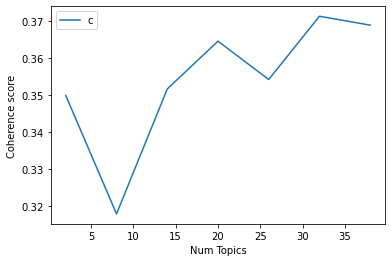

In [23]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=text_data, 
                                                        start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [39]:
# set the number of topics and the file name

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 8, id2word=dictionary)
ldamodel.save('model15.gensim')
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.042*"digital" + 0.036*"support" + 0.029*"cyber" + 0.029*"security" + 0.020*"strategy"')
(1, '0.020*"support" + 0.015*"analytics" + 0.015*"student" + 0.013*"improve" + 0.013*"services"')
(2, '0.036*"digital" + 0.025*"support" + 0.019*"strategy" + 0.018*"cloud" + 0.013*"capability"')
(3, '0.024*"cloud" + 0.021*"support" + 0.017*"services" + 0.017*"security" + 0.015*"cyber"')
(4, '0.029*"support" + 0.016*"cloud" + 0.015*"services" + 0.013*"cyber" + 0.011*"staff"')
(5, '0.044*"cyber" + 0.030*"essential" + 0.017*"support" + 0.016*"certification" + 0.016*"connectivity"')
(6, '0.020*"support" + 0.017*"jisc" + 0.011*"resource" + 0.011*"research" + 0.011*"siem"')
(7, '0.019*"need" + 0.013*"digital" + 0.011*"college" + 0.011*"jisc" + 0.011*"research"')


In [40]:
#set up the vis so you can save the model as an html
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model15.gensim')
import pyLDAvis
import pyLDAvis.gensim_models

lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary, sort_topics=True)
pyLDAvis.display(lda_display)
pyLDAvis.save_html(lda_display, 'gensim15.html')

In [41]:
pyLDAvis.display(lda_display)